In [7]:
#import sys
#!{sys.executable} -m pip install citipy

In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.378679272810345 169.8033787008353
-45.40472880645959 91.0183681649545
-34.727855130963384 80.3855023487821
-75.70303292233213 -69.97065113059728
-71.10113375353258 76.05408625764153
-79.03747911195573 -42.348816311447536
29.590383076041036 57.537522769907156
13.971376590278325 30.372260529231028
-23.066618011058537 36.14583033391284
-62.492700256626435 -58.77414573826593
-5.714991631779554 -59.0430625217941
69.44927191260896 41.88528598548791
0.8676118034465929 24.582127097335217
56.454208132230576 -65.95153110883588
33.3382006496268 -134.62821012067093
-18.249916027864046 54.91820665858938
-26.928915872712444 165.68360411064782
79.85271578039368 -85.56963445430125
34.6904839071445 -6.709879492986715
-28.40317827410456 -57.20111292577384
-17.636399129920605 -118.4407815031491
9.530869197631574 7.093993214174304
-73.14397785763717 -3.759240491623018
-39.62433502747491 102.04579305362057
-82.62391507019365 42.067690905154166
60.98863674324525 -82.66144547771351
86.07325647331885 51.5

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [14]:
import requests
from config import weather_api_key

In [15]:
url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=028697058d115ffdbd0beeac80bf1d2c


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
   
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | kerman
Processing Record 7 of Set 1 | bara
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | borba
Processing Record 10 of Set 1 | ostrovnoy
Processing Record 11 of Set 1 | yangambi
Processing Record 12 of Set 1 | sept-iles
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | saint-denis
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | kenitra
Processing Record 17 of Set 1 | itaqui
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | suleja
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | attawapiskat
City not found. Skipping...
Processing Reco

Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | neumunster
Processing Record 43 of Set 4 | beyneu
Processing Record 44 of Set 4 | ayr
Processing Record 45 of Set 4 | jujuy
City not found. Skipping...
Processing Record 46 of Set 4 | tubruq
City not found. Skipping...
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | tiruvottiyur
City not found. Skipping...
Processing Record 1 of Set 5 | kurumkan
Processing Record 2 of Set 5 | guajara-mirim
City not found. Skipping...
Processing Record 3 of Set 5 | leshukonskoye
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | sataua
City not found. Skipping...
Processing Record 6 of Set 5 | beloha
Processing Record 7 of Set 5 | inuvik
Processing Record 8 of Set 5 | brovary
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set 5 | nalut
Processing Record 11 of 

Processing Record 29 of Set 8 | sikandra rao
Processing Record 30 of Set 8 | iki-burul
Processing Record 31 of Set 8 | napoleon
Processing Record 32 of Set 8 | biltine
Processing Record 33 of Set 8 | tucupita
Processing Record 34 of Set 8 | lakeland
Processing Record 35 of Set 8 | mount gambier
Processing Record 36 of Set 8 | fiche
Processing Record 37 of Set 8 | paita
Processing Record 38 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | bargal
City not found. Skipping...
Processing Record 41 of Set 8 | betafo
Processing Record 42 of Set 8 | flin flon
Processing Record 43 of Set 8 | kampong thum
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | haines junction
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | presidente medici
Processing Record 48 of Set 8 | balakhta
Processing Record 49 of Set 8 | arvika
Processing Record 50 of Set 8 | fort saint john
Cit

Processing Record 15 of Set 12 | jakar
Processing Record 16 of Set 12 | mata
Processing Record 17 of Set 12 | tual
Processing Record 18 of Set 12 | acari
Processing Record 19 of Set 12 | kaeo
Processing Record 20 of Set 12 | zaporizhzhya
Processing Record 21 of Set 12 | manzil salim
Processing Record 22 of Set 12 | vanimo
Processing Record 23 of Set 12 | grand gaube
Processing Record 24 of Set 12 | madimba
Processing Record 25 of Set 12 | quatre cocos
Processing Record 26 of Set 12 | daru
Processing Record 27 of Set 12 | englewood
Processing Record 28 of Set 12 | sembakung
Processing Record 29 of Set 12 | xichang
Processing Record 30 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 31 of Set 12 | milkovo
Processing Record 32 of Set 12 | banda aceh
Processing Record 33 of Set 12 | atocha
Processing Record 34 of Set 12 | chum phae
Processing Record 35 of Set 12 | gizo
Processing Record 36 of Set 12 | havoysund
Processing Record 37 of Set 12 | san rafael del sur
Processin

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,74.01,81,100,16.02,NC,2022-09-29 14:06:18
1,Busselton,-33.6500,115.3333,60.91,64,0,10.22,AU,2022-09-29 14:04:09
2,Bambous Virieux,-20.3428,57.7575,71.22,68,4,13.71,MU,2022-09-29 14:09:51
3,Ushuaia,-54.8000,-68.3000,46.67,71,99,6.89,AR,2022-09-29 14:03:38
4,Saint-Philippe,-21.3585,55.7679,72.99,70,0,10.33,RE,2022-09-29 14:08:40


In [24]:
new_column_order = ["column2", "column4", "column1"]
df=df.reindex(columns=new_column_order)

NameError: name 'df' is not defined

In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

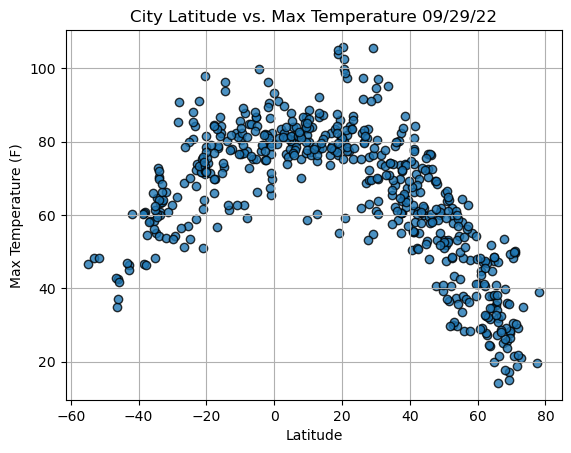

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

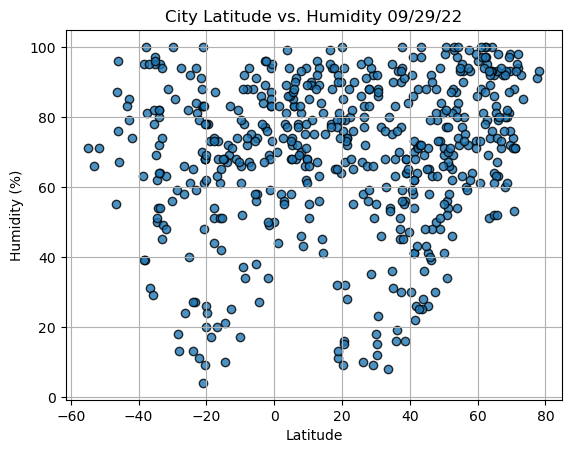

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

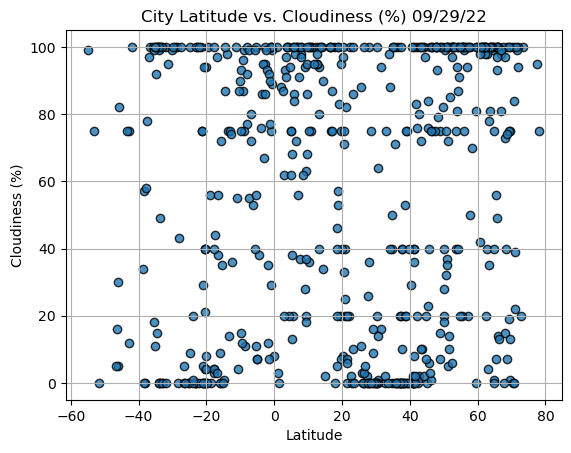

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

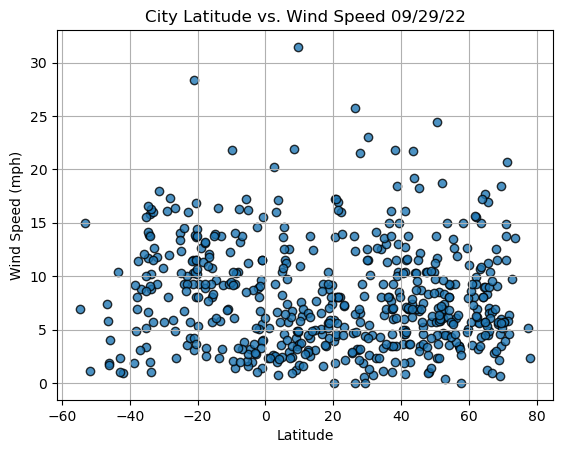

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()